In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("car_price_dataset_900.csv")
df

,brand,year,mileage_kmpl,engine_cc,horsepower,transmission,fuel_type,owner_type,price
0,Mercedes,2023,20.92,3078,107,automatic,electric,second,813805.13
1,Mercedes,2017,20.65,2844,339,manual,petrol,second,501144.16
2,BMW,2007,10.19,964,398,automatic,diesel,first,465527.87
3,Hyundai,2022,17.27,1577,361,automatic,hybrid,first,635489.75
4,Toyota,2018,21.53,2386,135,manual,petrol,first,281206.83
...,...,...,...,...,...,...,...,...,...
895,Mercedes,2018,21.48,1949,301,manual,electric,second,757209.24
896,BMW,2018,16.11,3313,195,manual,diesel,first,500238.96
897,Mercedes,2021,23.21,976,101,manual,diesel,first,587924.94
898,Mercedes,2019,12.66,2521,314,automatic,petrol,second,579831.93


In [3]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]).columns:
    df[i]=label.fit_transform(df[i]) 
df

,brand,year,mileage_kmpl,engine_cc,horsepower,transmission,fuel_type,owner_type,price
0,4,2023,20.92,3078,107,0,1,1,813805.13
1,4,2017,20.65,2844,339,1,3,1,501144.16
2,0,2007,10.19,964,398,0,0,0,465527.87
3,3,2022,17.27,1577,361,0,2,0,635489.75
4,5,2018,21.53,2386,135,1,3,0,281206.83
...,...,...,...,...,...,...,...,...,...
895,4,2018,21.48,1949,301,1,1,1,757209.24
896,0,2018,16.11,3313,195,1,0,0,500238.96
897,4,2021,23.21,976,101,1,0,0,587924.94
898,4,2019,12.66,2521,314,0,3,1,579831.93


In [4]:
x=df.drop("price",axis=1) #features
y=df["price"] # target


In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [7]:
y_pred=model.predict(x_test)
y_pred

array([309894.15, 616407.03, 276118.54, 343317.37,  50000.  , 275556.77,
       314816.82, 328946.01, 176268.22, 381204.87,  50000.  , 567416.15,
       597469.96,  50000.  , 159438.09, 590696.39, 661413.48, 471945.78,
       308723.01, 282309.49, 703907.56, 478261.12, 155906.61, 449169.61,
       223949.62, 113719.38, 388017.75,  86405.54, 583836.19, 308723.01,
       216052.38, 181236.18, 315812.49, 396525.63, 646371.75, 133136.28,
       247005.56, 250590.41, 297669.5 , 363811.7 ,  50667.19, 402711.18,
       197771.79, 442812.83, 450065.03, 156303.47, 111656.75, 217088.83,
       671543.7 , 388800.9 , 310902.81, 165153.7 , 160998.04, 528460.58,
       227051.64, 149518.83, 377253.22, 282988.07, 305318.01,  92564.78,
       337803.34, 288038.14,  50000.  , 201389.06,  50000.  , 202461.5 ,
       297377.88, 219257.76, 449555.89, 165153.7 ,  50000.  , 133247.  ,
       366478.18, 311040.71, 213680.94, 113719.38,  50000.  , 633645.59,
       299084.12, 408138.27, 297377.88, 719160.09, 

In [8]:
mse=mean_squared_error(y_test,y_pred)
print(f'mean Squared Error:{mse}')
rmse=np.sqrt(mse)
print(f'Root Mean Squared Error:{rmse}')

mean Squared Error:11894548092.720762
Root Mean Squared Error:109062.12950754612


In [9]:
score=r2_score(y_test,y_pred)
score

0.679198168154848

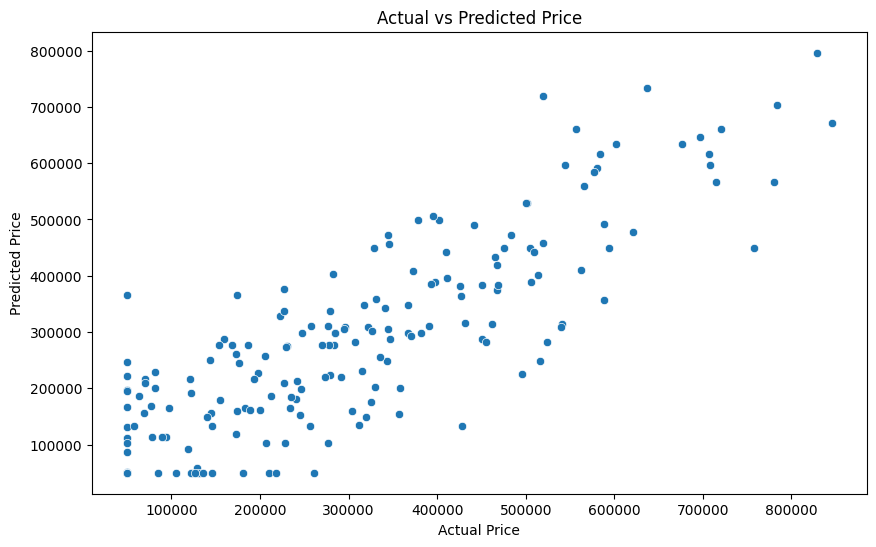

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

In [11]:
new_data=pd.DataFrame({"brand":[0],"year":[2023],"mileage_kmpl":[20.92],"engine_cc":[3078],"horsepower":[107],"transmission":[0]})
predicted_price=model.predict(new_data) 
predicted_price

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- fuel_type
- owner_type
